In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

In [25]:
df = pd.read_csv('spotify.csv')

In [26]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [27]:
df.shape

(170653, 19)

In [28]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [29]:
df.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [30]:
df[df.isnull().any(axis=1)]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo


In [31]:
df.drop(columns= ['artists','name', 'id'])


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,4,1921,0.0366,80.954
1,0.9630,1921,0.73200,0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,70,2020-01-17,0.3080,75.055


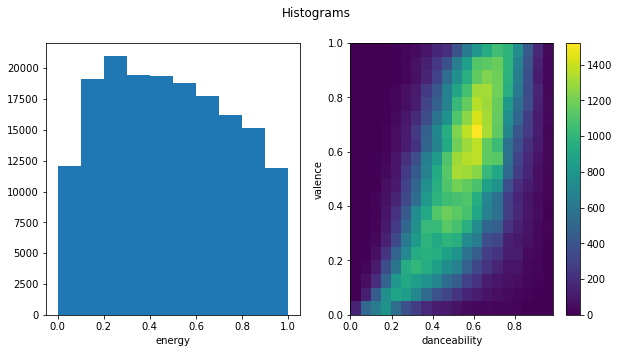

In [32]:
x = "danceability"
y = "valence"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(df[x], df[y], bins=20)
ax1.hist(df["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

In [38]:
df= df[::25]

In [34]:
#Dropping the columns that are not needed for StandardScaler, Valence will be the target 

X= df.drop(columns = ['valence','artists','name', 'id','release_date'])
y= df['valence']
           

In [40]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(X)


X_scaled = pd.DataFrame(scaled,columns = X.columns)

X_scaled

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,-2.152347,1.268291,-1.474462,4.995142,-1.016335,-0.291433,2.242932,1.348637,2.597571,-1.499537,0.651933,-1.254622,-0.380797,-1.156699
1,-2.152347,1.300170,0.759958,-0.315372,-1.378414,-0.291433,-0.535490,1.348637,0.038885,-0.888285,-1.533900,-1.437960,0.611328,-0.955881
2,-2.152347,-0.849016,0.228498,1.448864,-0.236759,3.431319,-0.425049,-1.219331,-0.159243,0.058583,0.651933,-1.437960,-0.250713,-1.187656
3,-2.152347,1.111552,-0.805850,1.233303,-0.687509,-0.291433,1.394849,1.063307,-0.402658,-0.055832,0.651933,-1.346291,-0.388889,-0.192980
4,-2.152347,1.268291,-1.263020,1.913350,-1.241711,-0.291433,2.341031,1.063307,-0.640412,-0.579712,0.651933,-1.392125,-0.401337,-0.555927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,1.667082,-1.282838,1.245702,-0.219551,0.483703,-0.291433,-0.535490,1.063307,-0.813067,1.092476,0.651933,2.182961,0.524191,2.496774
8529,1.667082,-1.339267,-0.268675,-0.080613,1.547770,-0.291433,-0.505934,-1.504661,-0.023384,1.206197,0.651933,1.632948,-0.421877,-0.702724
8530,1.667082,0.343796,0.691383,-0.277853,-0.225675,3.431319,-0.535490,0.492648,-0.436623,0.836429,-1.533900,1.632948,-0.359013,0.755502
8531,1.667082,-0.479749,-1.194445,0.956496,-0.613616,-0.291433,-0.475365,-1.219331,0.157762,0.201775,0.651933,1.587114,-0.390756,-0.170110


In [36]:
#Feature Selections

from sklearn.feature_selection import SelectKBest,f_regression
fs = SelectKBest(score_func=f_regression, k=2)
best = fs.fit_transform(X_scaled,y)

#get all feature names
features = np.array(list(X_scaled.columns))

#get features it deemed best to use
best_features = features[fs.get_support()]
print(best_features)

['danceability' 'energy']


<AxesSubplot:xlabel='danceability', ylabel='valence'>

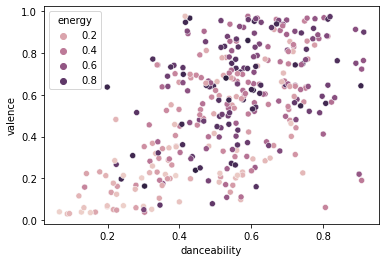

In [41]:
sns.scatterplot(data = df, x='danceability', y='valence', hue='energy')

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled[best_features], y, test_size = 0.3, random_state = 7)


In [45]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((5973, 2), (5973,), (2560, 2), (2560,))

In [49]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg_model = linreg.fit(X_train, y_train)

In [54]:
#finding the incercept and coefficient 
print('Model Intercept:',linreg_model.intercept_)
print('Model Slope:' ,linreg_model.coef_[0])

print('Coefficient of Determination:',linreg_model.score(X_test, y_test))

#creates table to show the features and their coefficients 
Cdf = pd.DataFrame(linreg_model.coef_, X_test.columns, columns=['Coefficients'])
Cdf

Model Intercept: 0.5313689230351765
Model Slope: 0.13117127800155579
Coefficient of Determination: 0.3484826852981422


,Coefficients
danceability,0.131171
energy,0.061901


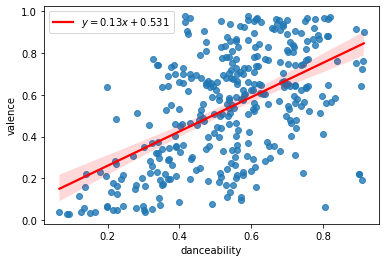

In [56]:
#creating a linear regression line of best fit 
import matplotlib.pyplot as plt

plot_rnet = sns.regplot(data = df,x="danceability", y="valence",line_kws={'color':'red',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(linreg_model.coef_[0],linreg_model.intercept_)})
plt.legend()

In [60]:
y_pred = linreg_model.predict(X_test)

In [61]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 0.17030275771007058
Mean Square Error: 0.043699472489991356
Root Mean Square Error: 0.20904418788856904


##These Error values are close to zero, which would accurately predict that the highter the danceability the more valence a song is recognized as